In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split

In [39]:
# Load the dataset (adjust path if needed)
df = pd.read_csv('../raw_data/air_fare_raw.csv')

# Display basic information
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
df.head(5)

Dataset shape: (12781, 10)

First 5 rows:


,Airline,Departure_Time,Arrival_Time,Duration,Departure,Destination,Date,Total_Stops,SClass,Price
0,VietJet Air,18:00,19:20,80,HAN,DAD,15-04-2025,0,ECONOMY,1147900
1,VietJet Air,21:05,22:25,80,HAN,DAD,15-04-2025,0,ECONOMY,1147900
2,Vietravel Airlines,17:55,19:10,75,HAN,DAD,15-04-2025,0,ECONOMY,1188800
3,Bamboo Airways,19:50,21:20,90,HAN,DAD,15-04-2025,0,ECONOMY,1253000
4,Vietravel Airlines,07:25,08:45,80,HAN,DAD,15-04-2025,0,ECONOMY,1397800


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12781 entries, 0 to 12780
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         12781 non-null  object
 1   Departure_Time  12781 non-null  object
 2   Arrival_Time    12781 non-null  object
 3   Duration        12781 non-null  int64 
 4   Departure       12781 non-null  object
 5   Destination     12781 non-null  object
 6   Date            12781 non-null  object
 7   Total_Stops     12781 non-null  int64 
 8   SClass          12781 non-null  object
 9   Price           12781 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 998.6+ KB


In [41]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,12781.0,2.586766e+02,2.076683e+02,45.0,90.0,130.0,410.0,1055.0
Total_Stops,12781.0,4.443314e-01,5.267227e-01,0.0,0.0,0.0,1.0,3.0
Price,12781.0,3.439932e+06,2.107961e+06,589000.0,2020000.0,3058000.0,4342000.0,14603000.0


In [42]:
df.isna().sum()

Airline           0
Departure_Time    0
Arrival_Time      0
Duration          0
Departure         0
Destination       0
Date              0
Total_Stops       0
SClass            0
Price             0
dtype: int64

Dữ liệu không thiếu thông tin
- Không có giá trị nào bị thiếu

## 1. String Handle

In [43]:
df[['Departure_Time', 'Arrival_Time']] = df[['Departure_Time', 'Arrival_Time']].apply(pd.to_datetime)
df['Date'] = (pd.to_datetime(df['Date'], dayfirst=True, format='%d-%m-%Y')).dt.day

C:\Users\toany\AppData\Local\Temp\ipykernel_10336\1275490570.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[['Departure_Time', 'Arrival_Time']] = df[['Departure_Time', 'Arrival_Time']].apply(pd.to_datetime)
C:\Users\toany\AppData\Local\Temp\ipykernel_10336\1275490570.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[['Departure_Time', 'Arrival_Time']] = df[['Departure_Time', 'Arrival_Time']].apply(pd.to_datetime)


In [44]:
def extract_hour(data, col):
    data[col.replace('_Time', '') + '_Hour'] = data[col].dt.hour
    
def extract_min(data, col):
    data[col.replace('_Time', '') + '_Min'] = data[col].dt.minute
    
def drop_col(data, col):
    data.drop(col, axis = 1, inplace=True)

In [45]:
extract_hour(df,'Departure_Time')
extract_min(df,'Departure_Time')
drop_col(df,'Departure_Time')

extract_hour(df,'Arrival_Time')
extract_min(df,'Arrival_Time')
drop_col(df,'Arrival_Time')

In [46]:
df.head(5)

,Airline,Duration,Departure,Destination,Date,Total_Stops,SClass,Price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
0,VietJet Air,80,HAN,DAD,15,0,ECONOMY,1147900,18,0,19,20
1,VietJet Air,80,HAN,DAD,15,0,ECONOMY,1147900,21,5,22,25
2,Vietravel Airlines,75,HAN,DAD,15,0,ECONOMY,1188800,17,55,19,10
3,Bamboo Airways,90,HAN,DAD,15,0,ECONOMY,1253000,19,50,21,20
4,Vietravel Airlines,80,HAN,DAD,15,0,ECONOMY,1397800,7,25,8,45


## 2. Data Normalization

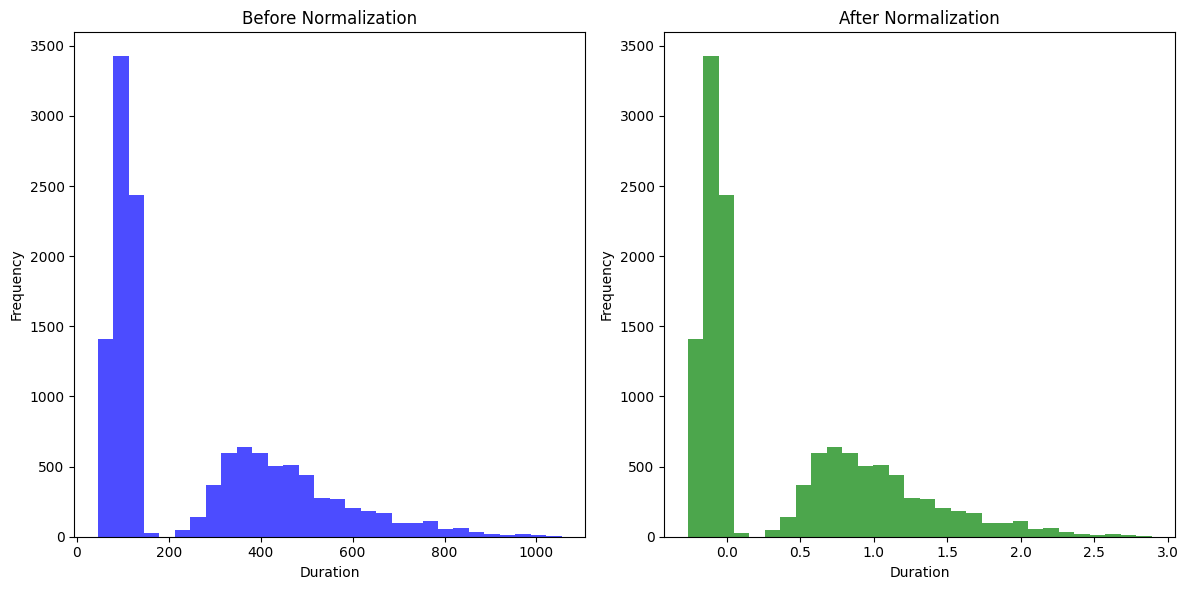

In [47]:
robust_scaler = RobustScaler()

df_before = df.copy()
# Normalize the 'Duration' column
df['Duration'] = robust_scaler.fit_transform(df[['Duration']])

# Hiển thị phân bố của 'Duration' trước và sau khi chuẩn hóa
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Before Normalization')
plt.hist(df_before['Duration'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Duration')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.title('After Normalization')
plt.hist(df['Duration'], bins=30, color='green', alpha=0.7)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Chuẩn Hóa Dữ Liệu (Data Normalization)

### Tại sao cần chuẩn hóa 'Duration'?
- **Cân bằng ảnh hưởng**: Biến Duration có phạm vi giá trị lớn (từ 75 đến 580 phút), có thể gây ảnh hưởng không tương xứng trong các mô hình học máy
- **Phù hợp thuật toán**: Nhiều thuật toán machine learning hoạt động tốt hơn với dữ liệu được chuẩn hóa (như các thuật toán dựa trên khoảng cách)
- **Tránh bias**: Ngăn chặn các biến có giá trị lớn chi phối quá trình học

### Lý do không chuẩn hóa các biến khác:
- **Biến phân loại**: Airline, Departure, Destination, SClass là biến phân loại nên không cần chuẩn hóa
- **Biến nhị phân/rời rạc**: Total_Stops, Date là biến số nguyên rời rạc với phạm vi nhỏ
- **Biến thời gian**: Các biến giờ/phút đã nằm trong phạm vi hợp lý (0-23 cho giờ, 0-59 cho phút)
- **Giá trị mục tiêu**: Price thường được giữ nguyên vì là biến mục tiêu

### Tại sao chọn RobustScaler?
- **Chống nhiễu**: Ít bị ảnh hưởng bởi outliers so với StandardScaler nhờ sử dụng median và IQR
- **Phù hợp với dữ liệu thời gian**: Duration có thể có outliers (chuyến bay quá dài hoặc quá ngắn)
- **Bảo toàn phân phối**: Giữ được đặc điểm phân phối của dữ liệu tốt hơn so với MinMaxScaler

### Nhận xét về phân bố trước và sau khi chuẩn hóa:
- **Hình dạng phân phối được giữ nguyên**: RobustScaler chỉ thay đổi thang đo mà không làm biến dạng phân phối
- **Tâm dịch chuyển về gần 0**: Sau chuẩn hóa, các giá trị phân bố quanh 0, giúp các thuật toán hoạt động hiệu quả hơn
- **Giảm tác động của outliers**: Những giá trị Duration cao (>400) đã được đưa về thang đo phù hợp, làm giảm ảnh hưởng quá mức trong mô hình

## 3. Xử lý dữ liệu phân loại

### Dữ liệu danh nghĩa (Nominal data):
- Là dữ liệu không có thứ tự hoặc mức độ cụ thể giữa các giá trị
- Ví dụ: Hãng hàng không, Nơi khởi hành, Nơi đến
- Sử dụng OneHotEncoder để chuyển đổi thành ma trận nhị phân
- Mỗi giá trị danh nghĩa sẽ được chuyển thành một cột mới, nơi giá trị 1 đại diện cho sự hiện diện của thuộc tính đó
- Điều này giúp tránh việc mô hình hiểu sai về mối quan hệ thứ tự giữa các giá trị

### Dữ liệu thứ tự (Ordinal data):
- Là dữ liệu có thứ tự hoặc mức độ cụ thể giữa các giá trị
- Ví dụ: Hạng ghế (Economy, Business, First Class)
- Sử dụng LabelEncoder để chuyển đổi thành các số nguyên liên tiếp
- Các giá trị được mã hóa thành các số từ 0 đến n-1, giữ được mối quan hệ thứ tự
- Phù hợp khi thuộc tính có thứ bậc tự nhiên mà ta muốn mô hình nắm bắt được


In [48]:
# categoricals = [f for f in trainset.columns if trainset.dtypes[f] == 'object']
# trainset[categoricals] = trainset[categoricals].apply(lambda x: x.astype('category'))
# testset[categoricals] = testset[categoricals].apply(lambda x: x.astype('category'))
categoricals = df.select_dtypes(include=['object']).columns.tolist()
# Convert categorical columns to category dtype
for col in categoricals:
    df[col] = df[col].astype('category')

In [49]:
label_encoder = LabelEncoder()

def getfullitemsforOHE(wholedf, featlist, sort=True):
    def sortornot(X):
        if sort==False:
            return X
        else:
            return sorted(X)
       
    fulllist=[]
    for feat in featlist:
        fulllist.append(sortornot(wholedf[feat].unique()))
    return fulllist


cat_columns = ['Airline', 'Departure', 'Destination']
cats = getfullitemsforOHE(df, cat_columns)
one_hot_encoder = OneHotEncoder(categories=cats, sparse_output=False, handle_unknown='ignore')

In [50]:
# df_after = df.copy()
df_after = one_hot_encoder.fit_transform(df[cat_columns])
df_after_ohe = pd.DataFrame(df_after, columns=one_hot_encoder.get_feature_names_out(cat_columns))
df = pd.concat([df, df_after_ohe], axis=1)
df.drop(['Airline', 'Departure', 'Destination'], axis=1, inplace=True)

# áp dụng LabelEncoder cho các cột SClass
df['SClass'] = label_encoder.fit_transform(df['SClass'])
df

,Duration,Date,Total_Stops,SClass,Price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min,Airline_Bamboo Airways,...,Destination_TBB,Destination_THD,Destination_UIH,Destination_VCA,Destination_VCL,Destination_VCS,Destination_VDH,Destination_VDO,Destination_VII,Destination_VKG
0,-0.156250,15,0,1,1147900,18,0,19,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.156250,15,0,1,1147900,21,5,22,25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.171875,15,0,1,1188800,17,55,19,10,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.125000,15,0,1,1253000,19,50,21,20,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.156250,15,0,1,1397800,7,25,8,45,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12776,0.703125,21,1,1,4080000,6,40,12,35,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12777,1.156250,21,1,1,2734000,6,40,15,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12778,1.375000,21,1,1,2899000,6,50,16,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12779,1.406250,21,1,1,2914000,6,40,16,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12781 entries, 0 to 12780
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Duration                    12781 non-null  float64
 1   Date                        12781 non-null  int32  
 2   Total_Stops                 12781 non-null  int64  
 3   SClass                      12781 non-null  int64  
 4   Price                       12781 non-null  int64  
 5   Departure_Hour              12781 non-null  int32  
 6   Departure_Min               12781 non-null  int32  
 7   Arrival_Hour                12781 non-null  int32  
 8   Arrival_Min                 12781 non-null  int32  
 9   Airline_Bamboo Airways      12781 non-null  float64
 10  Airline_VietJet Air         12781 non-null  float64
 11  Airline_Vietnam Airlines    12781 non-null  float64
 12  Airline_Vietravel Airlines  12781 non-null  float64
 13  Departure_BMV               127

## Chia tập dữ liệu thành 
* train (70%)
* validation (15%) 
* tập test (15%)

In [53]:
train_data, temp_data = train_test_split(df, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Reset index cho tất cả các tập dữ liệu
train_data.reset_index(inplace=True, drop=True)
val_data.reset_index(inplace=True, drop=True)
test_data.reset_index(inplace=True, drop=True)

# Kiểm tra tỷ lệ phân chia
total = len(df)
print(f"Tổng số mẫu: {total}")
print(f"Train: {len(train_data)} mẫu ({len(train_data)/total:.1%})")
print(f"Validation: {len(val_data)} mẫu ({len(val_data)/total:.1%})")
print(f"Test: {len(test_data)} mẫu ({len(test_data)/total:.1%})")

Tổng số mẫu: 12781
Train: 8946 mẫu (70.0%)
Validation: 1917 mẫu (15.0%)
Test: 1918 mẫu (15.0%)


In [54]:
# Tạo thư mục để lưu dữ liệu đã tiền xử lý
import os

# Tạo thư mục clean_data nếu chưa tồn tại
clean_data_dir = '../clean_data'
os.makedirs(clean_data_dir, exist_ok=True)

# Lưu các tập dữ liệu đã được xử lý
train_data.to_csv(f'{clean_data_dir}/train_cleaned.csv', index=False)
val_data.to_csv(f'{clean_data_dir}/val_cleaned.csv', index=False)
test_data.to_csv(f'{clean_data_dir}/test_cleaned.csv', index=False)

print(f"Đã lưu dữ liệu đã tiền xử lý vào thư mục {clean_data_dir}")

Đã lưu dữ liệu đã tiền xử lý vào thư mục ../clean_data
